# Исследование эффективности рекламной компании 

Несколько прошлых месяцев развлекательное приложение Procrastinate Pro+ постоянно несёт убытки - в привлечение пользователей была вложена куча денег, а толку никакого. В распоряжении есть лог сервера с данными о посещениях приложения Procrastinate Pro+ новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов.

<strong>Цель:</strong> Выявить причины неокупаемости рекламной компании развлекательного приложения Procrastinate Pro+ <br>
Результаты исследования будут переданы отделу маркетинга в виде рекомендаций для повышения эффективности. <br>

Входные данные:
Таблица visits - информация о сессиях пользователей
<ul> 
<li>User Id - уникальный идентификатор пользователя,
<li>Region - страна пользователя,
<li>Device - тип устройства пользователя,
<li>Channel - идентификатор источника перехода,
<li>Session Start - дата и время начала сессии,
<li>Session End - дата и время окончания сессии.
</ul>
Таблица orders - информация о покупках
<ul> 
<li>User Id — уникальный идентификатор пользователя,
<li>Event Dt — дата и время покупки,
<li>Revenue — сумма заказа
</ul> 
Таблица costs - рекламные расходы
<ul> 
<li>Channel — идентификатор рекламного источника,
<li>Dt — дата проведения рекламной кампании,
<li>Costs — расходы на эту кампанию.
</ul> 
<ol> 
<strong>Основные этапы исследование:</strong>
<li>Изучение общей информации о донных</li> 
<li>Описание функций для расчета и анализа LTV, ROI, удержания и конверсии</li> 
<li>Исследовательский анализ данных</li>
<li>Маркетинг</li>
<li>Оценка окупаемости рекламы</li>
<li>Вывод</li>    
</ol>

In [1]:

# загрузка всех нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta


## Изучение данных из файла

In [2]:
# функция для просмотра общей информации о таблице
def df_info(df):
    df.info()
    print('\nПервичная статистика по данным\n')
    display(df.describe().T)
    print('\nДесять первых строк\n')
    display(df.head(10))
    print('\nКоличество пустых строк:', df.isna().sum())
 

In [3]:
# загружаем данные
visits = pd.read_csv('visits_info_short.csv')   # журнас сессий
df_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Первичная статистика по данным



,count,mean,std,min,25%,50%,75%,max
User Id,309901.0,4.997664e+11,2.887899e+11,599326.0,2.493691e+11,4.989906e+11,7.495211e+11,9.999996e+11



Десять первых строк



,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05



Количество пустых строк: User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


In [4]:
orders = pd.read_csv('orders_info_short.csv')   # заказы
df_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Первичная статистика по данным



,count,mean,std,min,25%,50%,75%,max
User Id,40212.0,4.990295e+11,2.860937e+11,599326.00,2.511324e+11,4.982840e+11,7.433327e+11,9.998954e+11
Revenue,40212.0,5.370608e+00,3.454208e+00,4.99,4.990000e+00,4.990000e+00,4.990000e+00,4.999000e+01



Десять первых строк



,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99



Количество пустых строк: User Id     0
Event Dt    0
Revenue     0
dtype: int64


In [5]:
costs = pd.read_csv('costs_info_short.csv')     # затраты на маркетинг
df_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Первичная статистика по данным



,count,mean,std,min,25%,50%,75%,max
costs,1800.0,58.609611,107.740223,0.8,6.495,12.285,33.6,630.0



Десять первых строк



,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5



Количество пустых строк: dt         0
Channel    0
costs      0
dtype: int64


In [6]:
# проверим дубликаты строк
print('Количество дубликатов в журнале сессий: ',visits.duplicated().sum())
print('Количество дубликатов в заказах: ', orders.duplicated().sum())
print('Количество дубликатов в затратах на маркетинг: ', costs.duplicated().sum())

Количество дубликатов в журнале сессий:  0
Количество дубликатов в заказах:  0
Количество дубликатов в затратах на маркетинг:  0


Полных дубликатов нет

In [7]:
#преобразуем названия столбцов
costs.columns = costs.columns.str.lower()
orders = orders.rename(columns = {'Revenue': 'revenue', 'User Id': 'user_id', 'Event Dt': 'event_dt'})
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
#orders.columns.value_counts()

In [8]:
# преобразуем данные о времени для дальнейших расчётов
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


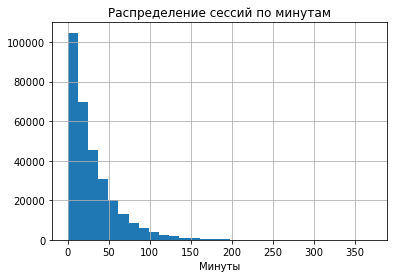

count    309901.000000
mean         30.001514
std          30.051059
min           0.000000
25%           8.616667
50%          20.733333
75%          41.616667
max         370.950000
Name: session_duration, dtype: float64

In [9]:
# посмотрим продолжительность сессий
visits['session_duration'] = visits['session_end'] - visits['session_start']
(visits.session_duration.dt.seconds/60).hist(bins=30)
plt.title('Распределение сессий по минутам')
plt.xlabel('Минуты')
plt.show()
(visits.session_duration.dt.seconds/60).describe()

In [10]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [11]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

таблица visits хранит информацию о 309901 посещений сайта, средняя продолжительностью 30 минут. Пользователи из 4 регионов (US, UK, France, Germany) и 4 типами устройств(Iphone, Android,PC,MAC)

## Функции для расчета и анализа LTV, ROI, удержания и конверсии



In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])      # сортируем сессии по id пользователя и дате, чтобы найти первые значения для параметров пользователя
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

  
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей (среднюю стоимость привлечения пользователя)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 
    
    # функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.


In [19]:
# Получим профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
# Установим момент и горизонт анализа данных. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [21]:
print('минимальная дата привлечения пользователей: ', profiles['dt'].min())    #минимальная дата привлечения пользователей
print('максимальная дата привлечения пользователей: ', profiles['dt'].max())    #максимальная дата привлечения пользователей

минимальная дата привлечения пользователей:  2019-05-01
максимальная дата привлечения пользователей:  2019-10-27


Данные о новых пользователях, пришедших с 1 мая по 27 октября 2019 года. В нашем исследовании мы принимаем за горизонт анализа 2 недели, а за точку наблюдения - 1 ноября

In [22]:
# Распределение пользователей по странам
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending=False).style.format({'payer': '{:.2%}'})

,user_id,payer
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


In [23]:
profiles.query('payer==True').groupby('region').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending=False)

,user_id
region,
United States,6902
UK,700
France,663
Germany,616


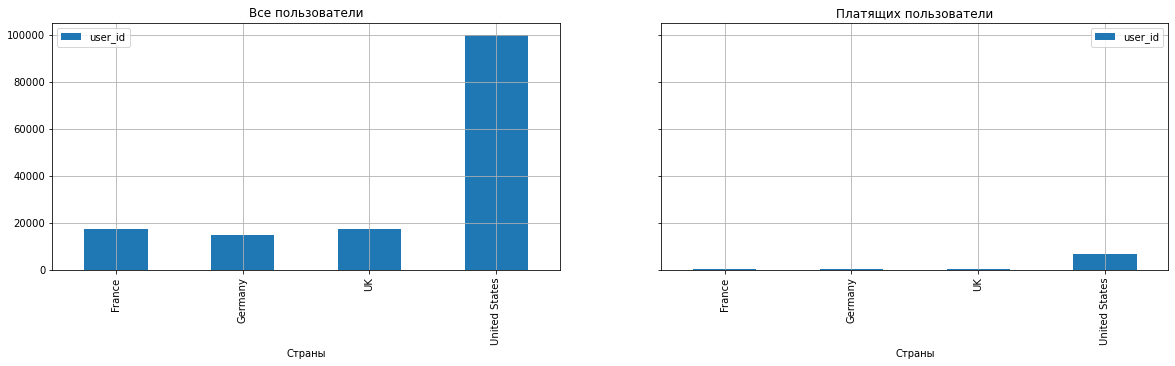

In [24]:
ax1 = plt.subplot(2, 2, 1)
profiles.groupby('region').agg({'user_id': 'nunique'}).plot(kind = 'bar',figsize = (20,10), grid=True, ax=ax1)
plt.legend()
plt.xlabel('Страны')
plt.title('Все пользователи')
ax2 = plt.subplot(2, 2, 2, sharey = ax1)
profiles.query('payer==True').groupby('region').agg({'user_id': 'nunique'}).plot(kind = 'bar',grid=True, ax=ax2)
plt.legend()
plt.xlabel('Страны')
plt.title('Платящих пользователи')
plt.show()

Основная часть пользователей из США - 100тыс чел, из них только 6108 - платящие пользователи (около 7%), в Германии около 15 тыс чел, в Великобритании и Франции около 17.5 тыс, а доля платящих в Германии 4 %, во Франции 3,7%

In [25]:
# Посмотрим какими устройствами пользуются клиенты
display(profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending=False).style.format({'payer': '{:.2%}'}))   # количество уникальных пользователей и доля платящих
# Посмотрим какими устройствами пользуются платящие клиенты
display('Количество платящих пользователей', profiles.query('payer==True').groupby('device').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending=False))

,user_id,payer
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


'Количество платящих пользователей'

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


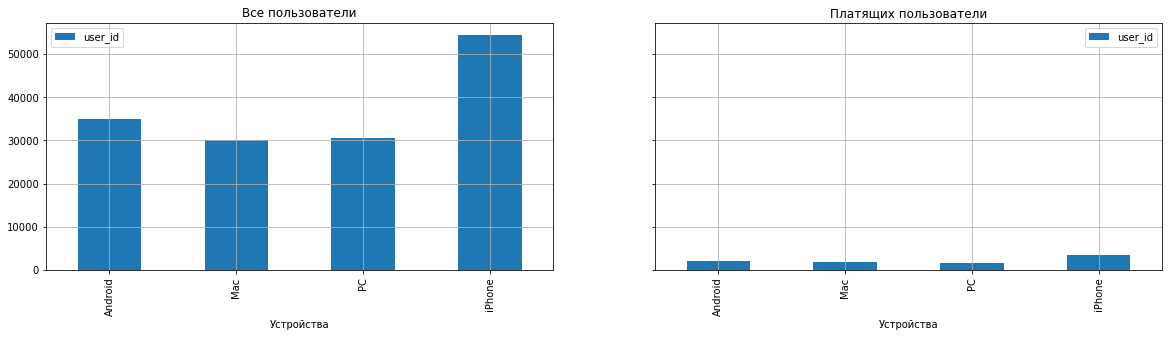

In [26]:
ax1 = plt.subplot(2, 2, 1)
profiles.groupby('device').agg({'user_id': 'nunique'}).plot(kind = 'bar',figsize = (20,10), grid=True, ax=ax1)
plt.legend()
plt.xlabel('Устройства')
plt.title('Все пользователи')
ax2 = plt.subplot(2, 2, 2, sharey = ax1)
profiles.query('payer==True').groupby('device').agg({'user_id': 'nunique'}).plot(kind = 'bar',grid=True, ax=ax2)
plt.legend()
plt.xlabel('Устройства')
plt.title('Платящих пользователи')
plt.show()

Большая часть пользователей заходит с мобильных устройств. Пользователи предпочитают Iphone (возможно потому что большая часть из США). Процент платящих больше у MAC - 8,9, а вот у PC только 6,7. В общем и целом пользователи Apple имеют лучшую конверсию в покупателей

In [27]:
# Посмотрим из каких каналов пришло больше пользователей
display(profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending=False).style.format({'payer': '{:.2%}'}))   # количество уникальных пользователей и доля платящих
display('Количество платящих пользователей', profiles.query('payer==True').groupby('channel').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending=False))

,user_id,payer
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


'Количество платящих пользователей'

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


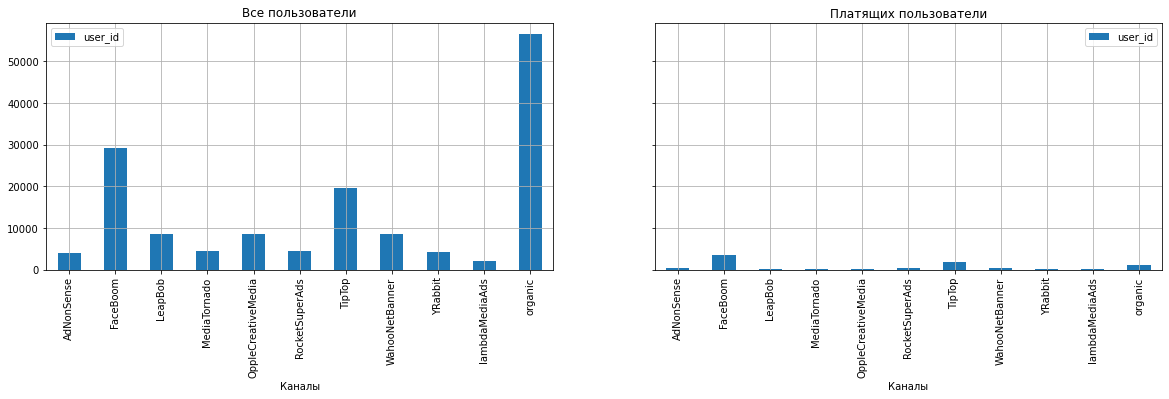

In [28]:
ax1 = plt.subplot(2, 2, 1)
profiles.groupby('channel').agg({'user_id': 'nunique'}).plot(kind = 'bar',figsize = (20,10), grid=True, ax=ax1)
plt.legend()
plt.xlabel('Каналы')
plt.title('Все пользователи')
ax2 = plt.subplot(2, 2, 2, sharey = ax1)
profiles.query('payer==True').groupby('channel').agg({'user_id': 'nunique'}).plot(kind = 'bar',grid=True, ax=ax2)
plt.legend()
plt.xlabel('Каналы')
plt.title('Платящих пользователи')
plt.show()

Посмотрев рекламные источники привлечения, можно выделить каналы, из которых пришло больше всего платящих пользователей - FaceBoom, TipTop, меньше с канала lambdaMediaAds. Но у lambdaMediaAds	хорошая доля платящих, также в топе по доле платящих каналы FaceBoom 1,22, AdNonSense 1,13 TipTop 0,96

##  Маркетинг

Нужно выяснить:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

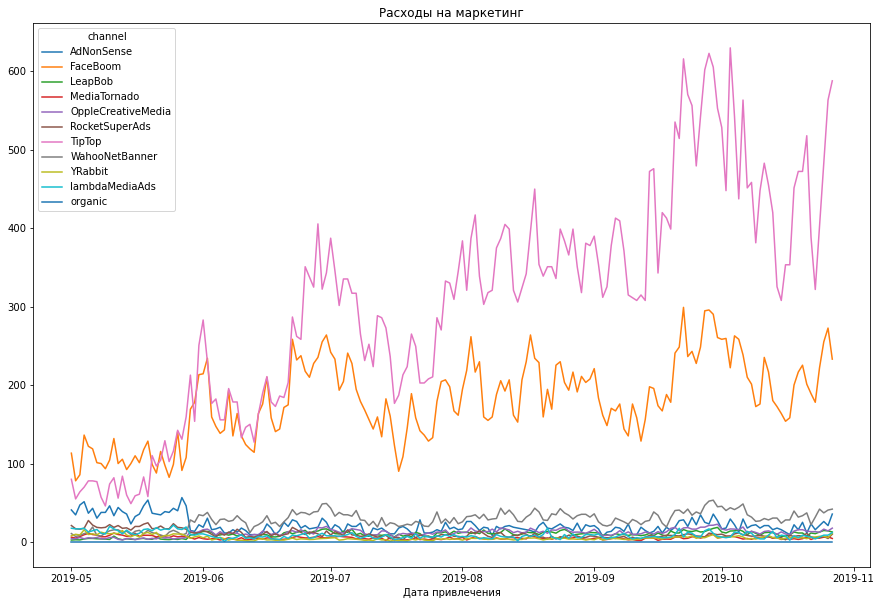

In [30]:
# посчитаем общую стоимость расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.
profiles.pivot_table(index = 'dt', columns = 'channel', values = 'acquisition_cost', aggfunc =sum ).plot(figsize = (15, 10))
plt.xlabel('Дата привлечения')
plt.title('Расходы на маркетинг')
plt.show()

                         cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172


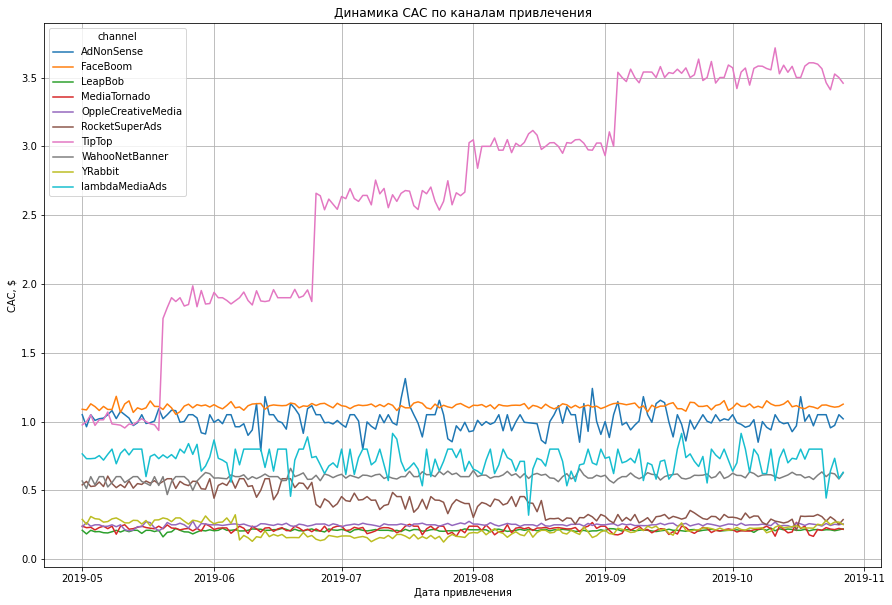

In [46]:
# посмотрим сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. 


cac = (profiles.groupby('channel').agg({'acquisition_cost' : 'mean'}).rename(columns = {'acquisition_cost':'cac'}).sort_values(by='cac',ascending=False))
print(cac)

profiles.pivot_table(
    index='dt', columns='channel', values = 'acquisition_cost' , aggfunc =  'mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


 Привлечение одного пользователя из источника "FaceBoom" и "AdNonSence" обошлось компании в среднем в 1 доллар, "YRabbit", "LeapBob", "MediaTornado" около 0.25 доллара, а стоимость привлечения из источника TipTop постоянно растёт с 1 до 3.5 долларов(в среднем 2.7$).

Рассчитаем средний САС на одного пользователя для всего проекта
Исключим из анализа «органических» пользователей, тк стоимость их привлечения равно 0

In [47]:
profiles_noorganic = profiles.query('channel != "organic"')['acquisition_cost'].mean()
print(profiles_noorganic)

1.127481323942928


В среднем в 1,27$ компании обходится каждый новый клиент

## Окупаемость рекламы для привлечения пользователей


Исключим из анализа «органических» пользователей, потому что они пришли самостоятельно, а не благодаря рекламе и стоимость их привлечения равно 0.

In [33]:
profiles = profiles.query('channel != "organic"')

### Общая окупаемость рекламы

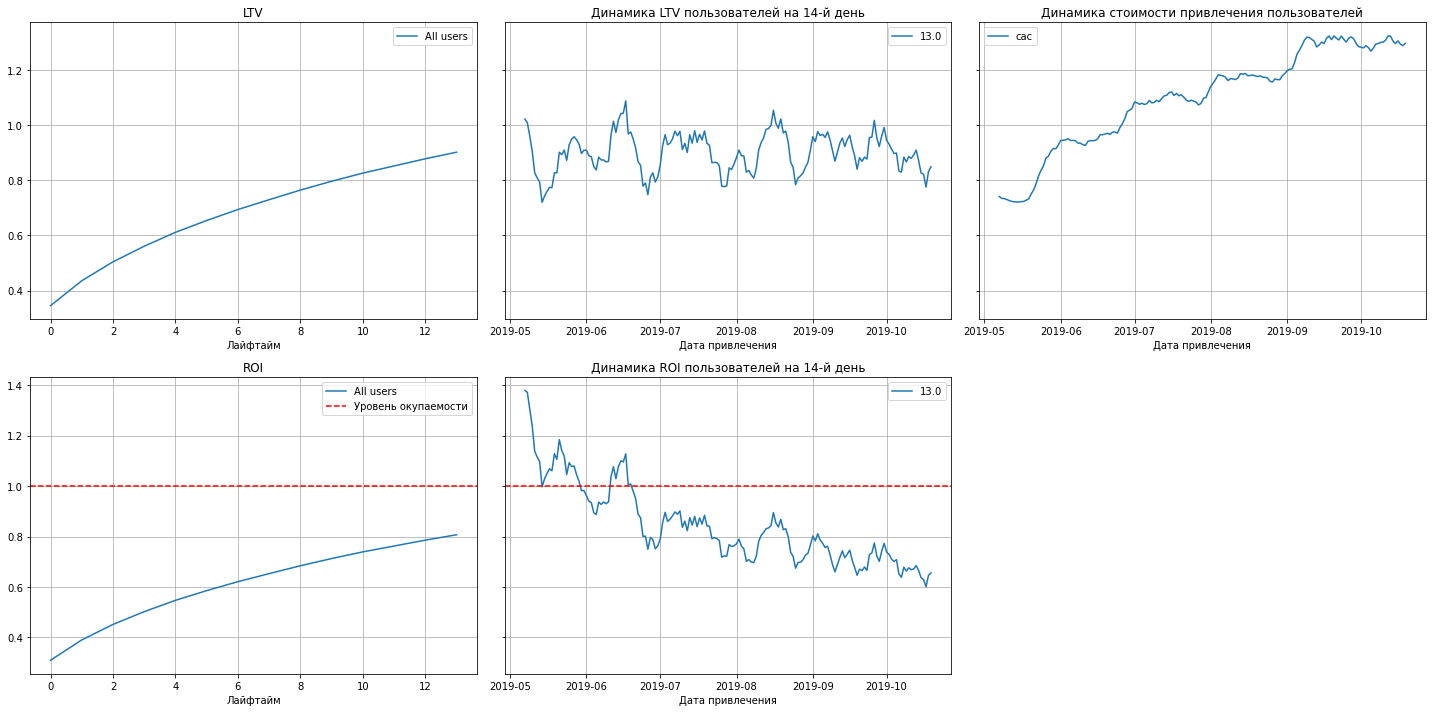

In [34]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Судя по графику 4 "ROI", реклама не окупилась, к 14-му дню приближается к 0.8, но не достигает значения CAC. CAC растёт - увеличение рекламного бюджета. Скачкообразное повышение CAC в динамике


### Окупаемость рекламы с разбивкой по устройствам

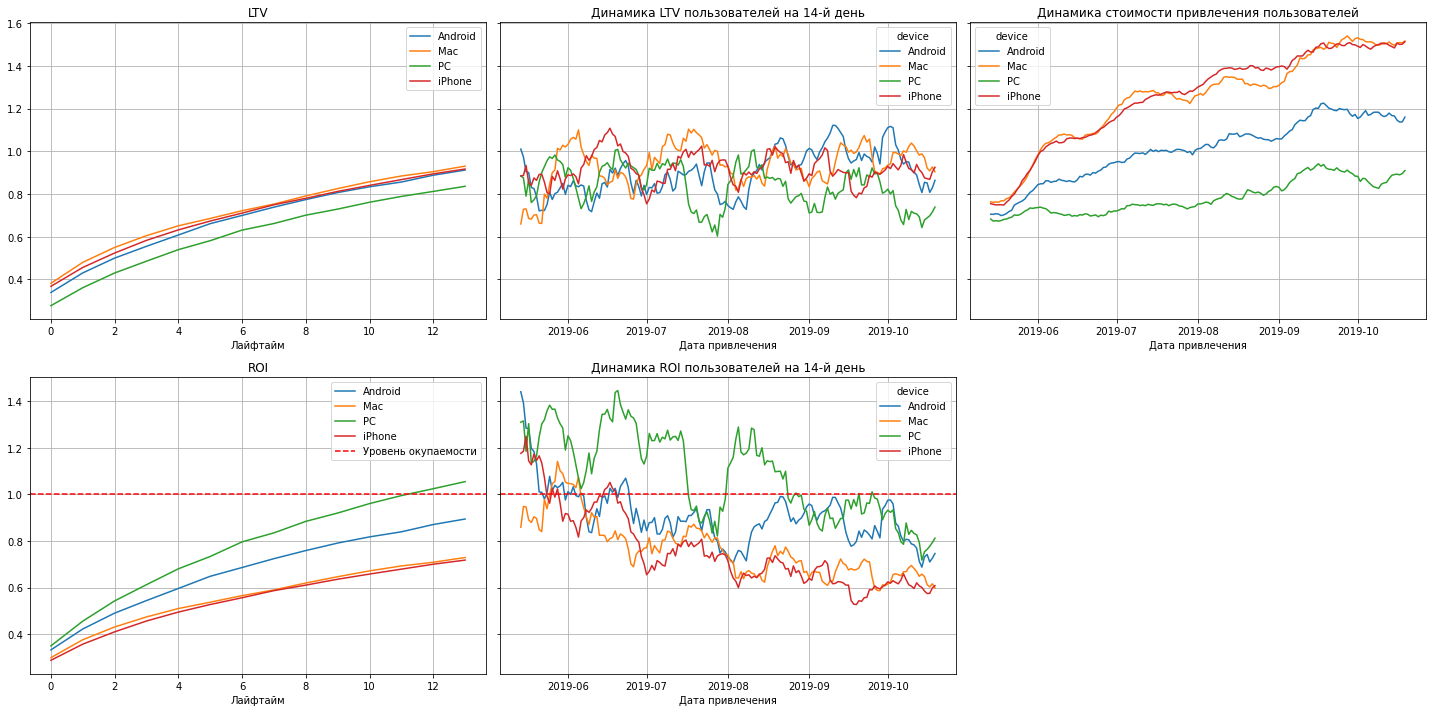

In [35]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

Судя по графикам, самый высокий LTV у MAC и Iphone, также как и рост стоимости привлечения выше у этих устройств. По Roi видим, что реклама окупилась только для пользователей PC. 

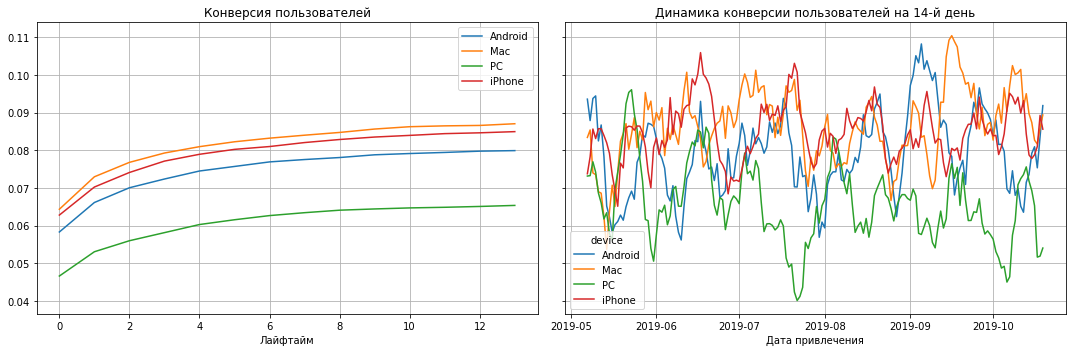

In [36]:
# Рассмотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи, которые пользуются Mac и Iphone, чаще переходят в статус платящих 

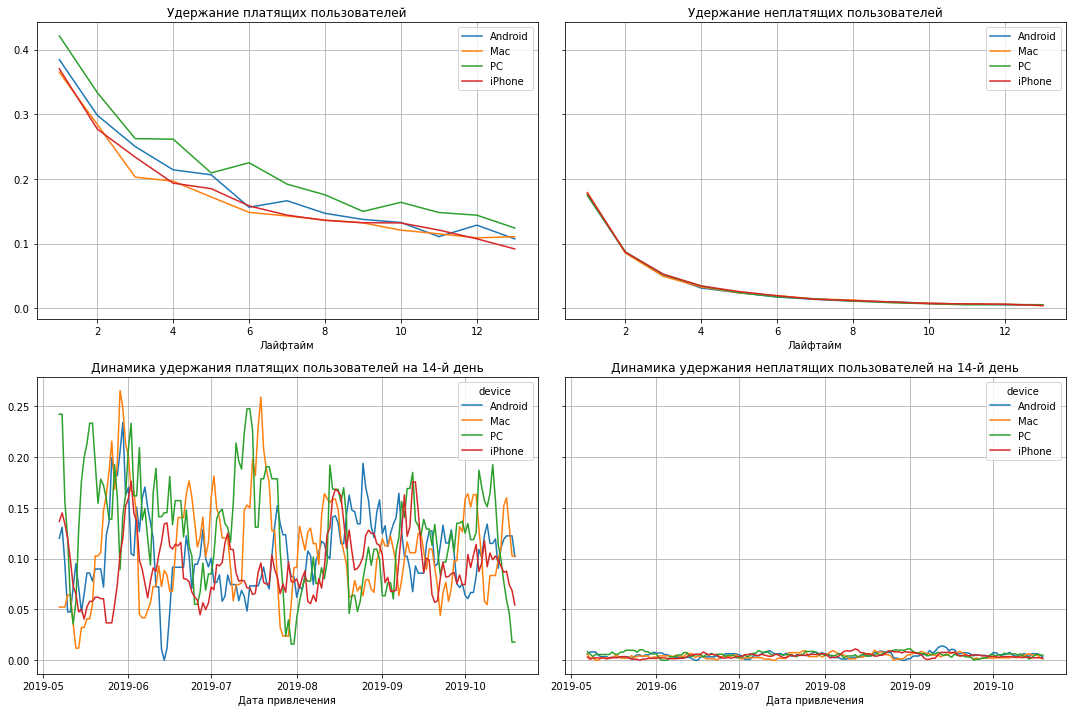

In [37]:
# удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

### Окупаемость рекламы с разбивкой по странам

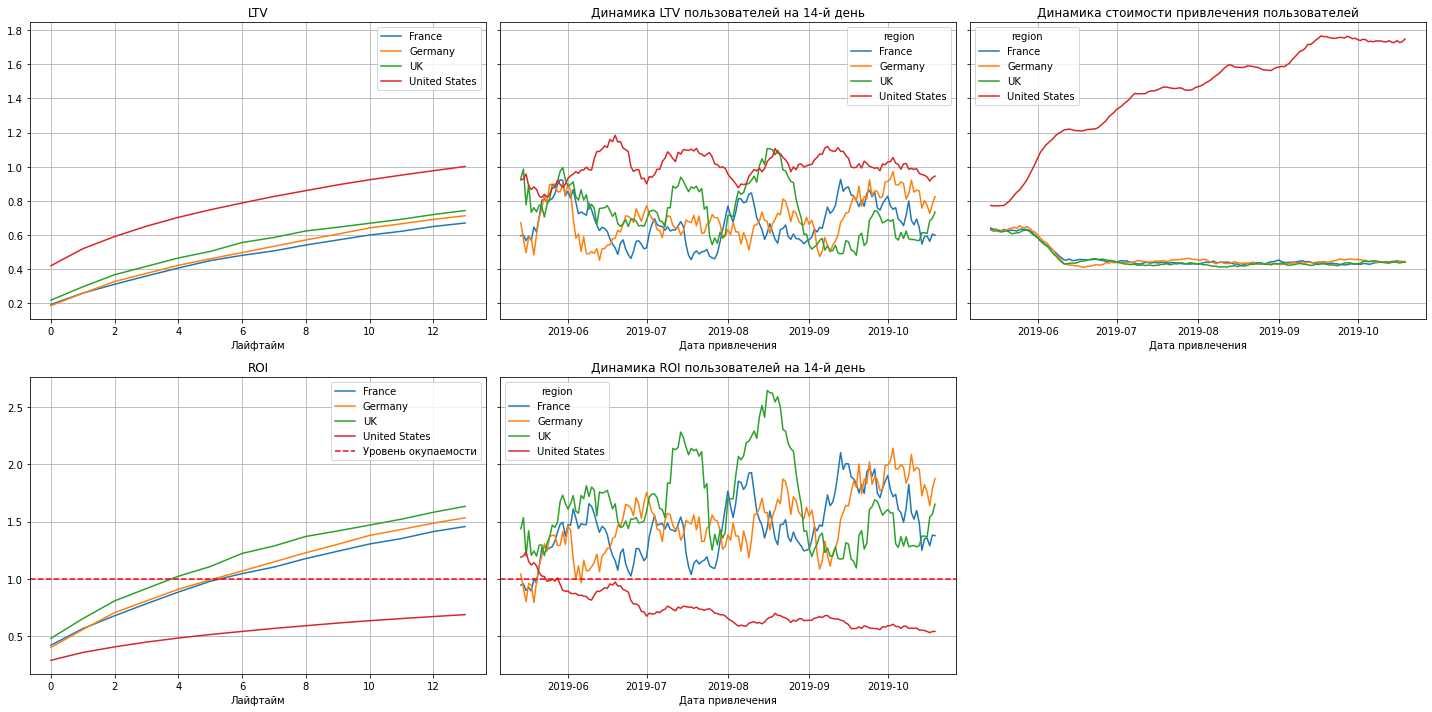

In [38]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

Наблюдая данные в разрезе стран, видим явную проблему с США - стоимость привлечения пользователей сильно растёт, окупаемости нет. В Германии, Великобритании, Франции всё выглядит хорошо- окупаемость стабильная. Так же посмотрим на конверсию и удержание

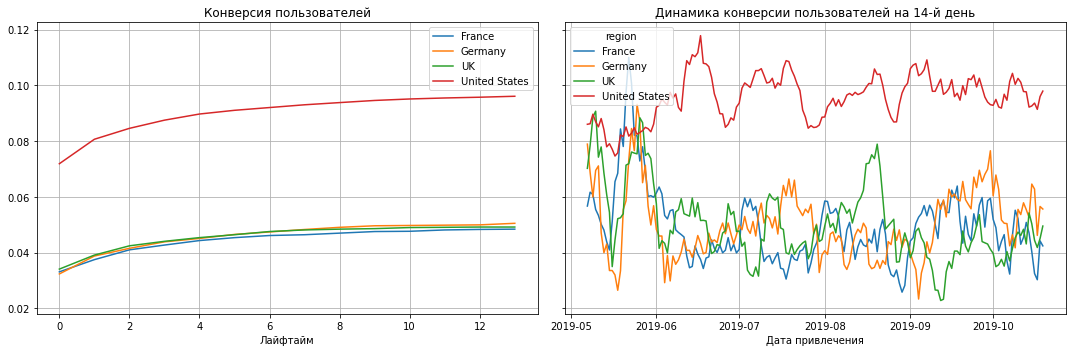

In [39]:
#конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По конверсии США сильно лидируют 

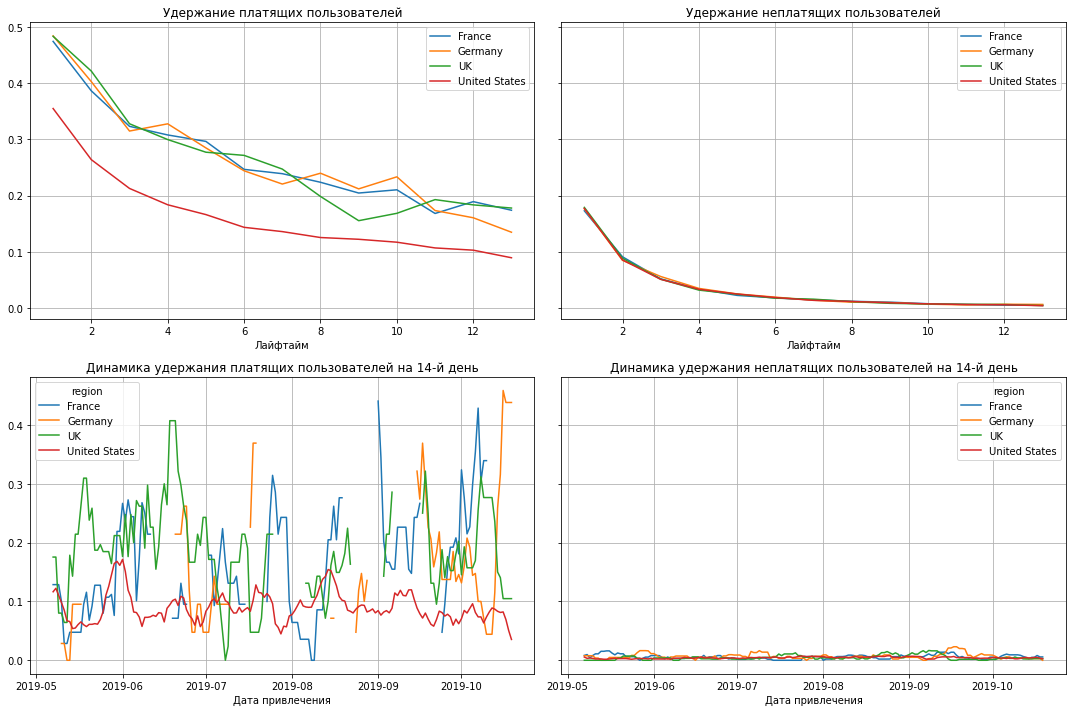

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Кривая удержания платящих пользователей находится выше, чем кривая неплатящих, а форма распределений близка к обратно-экспоненциальной, В Штатах удержание хуже. НА графиге динамики удержания платящих пользователей у США стабильно, в Европе линии прерывистые, тк не каждый день есть платящие пользователи

### Окупаемость рекламы с разбивкой по рекламным каналам

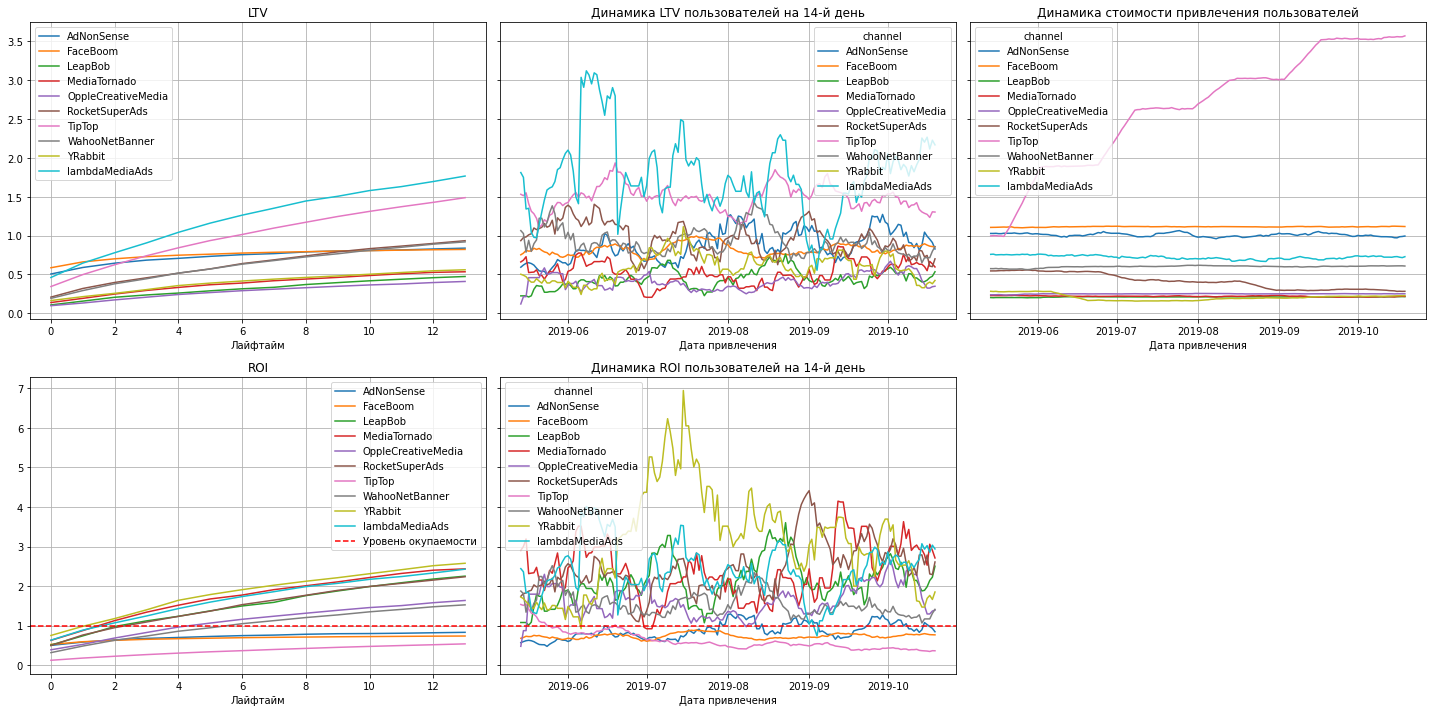

In [41]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions = dimensions)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 14) 

В разрезе канала привлечения выделяется TipTop огромными затратами на рекламу, которые постоянно повышаются, порог окупаемости не достигнут. Также FaceBoom и AdNonSence ниже уровня CAC. Причём LTV TipTop стабильно растёт. LTV FaceBoom не сильно увеличивается и пользователи, привлечённые с этого канала стабильно не окупаются. Посмотрим на конверсию и удержание

Посмотрим на удержание

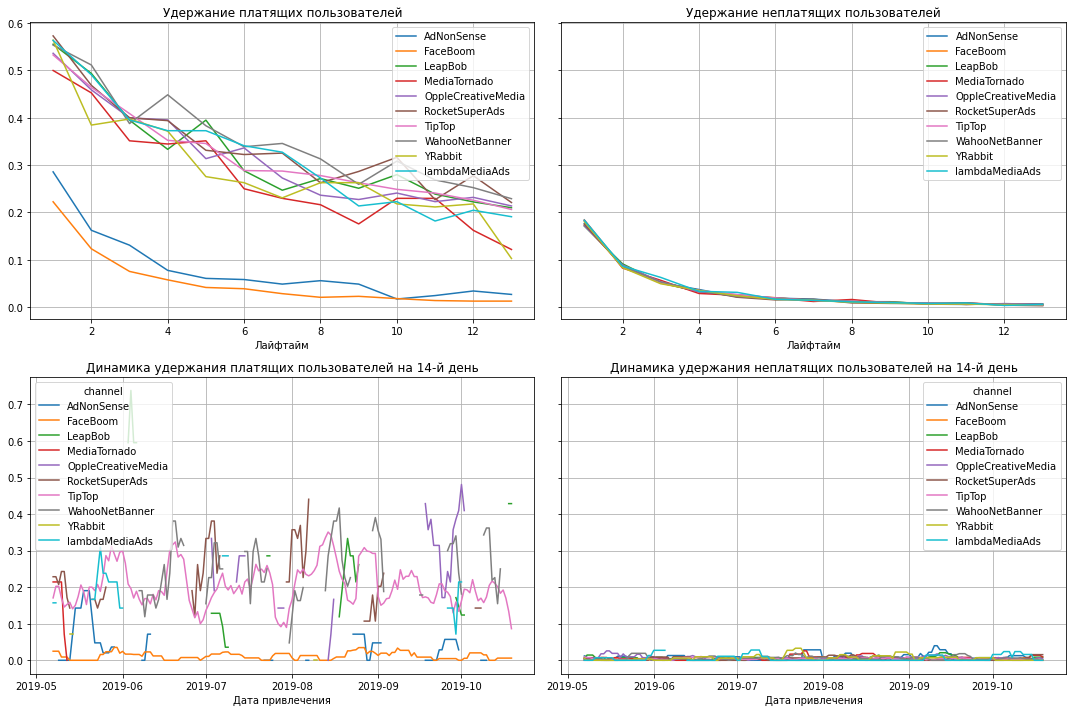

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

пользователи FaceBoom стабильно плохо удерживаются. Для платящих пользователей,пришедших с канала FaceBoom удержание 14-го дня ниже, чем на остальных устройствах, примерно на 20%. Также проблемы с удержанием у канала AdNonSence

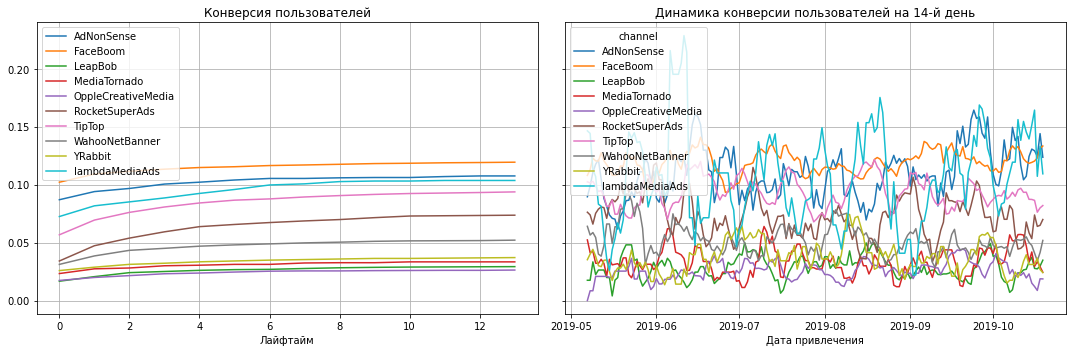

In [43]:
# посмотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи из канала FaceBoom, TipTop конвертируются  хорошо, причём постоянно. У FaceBoom хорошая конвертация, но нет окупаемости и проблемы с удержанием, возможно есть технические ошибки и цена рекламы у канала высокая

In [44]:
print(profiles.query('channel == "FaceBoom"')['region'].unique())
print(profiles.query('channel == "TipTop"')['region'].unique())


['United States']
['United States']


## Вывод


Исследовав данные покупок и рекламных расходов, удалось выявить некоторые слабые места, которые, возможно, и являются причиной убыточности рекламной компании.
Страной, с наибольшим количеством пользователей в целом и наибольшим количеством платящих пользователей, является США. Как мы заметили, пользователи хорошо конвертируются, но присутствует низкое удержание, а по ROI видим, что окупаемость не достигается, затраты на рекламу постоянно растут. Рассматривая пользователей в разрезе по каналам привлечения, обнаружили проблемы с каналами FaceBoom и TipTop. Низкое удержание платящих пользователей у канала Faceboom при хорошей конвертации(возможно, приходят не типичные пользователи приложения и не остаются надолго)
TipTop: хорошая конвертация пользователей, но нет окупаемости, тк стоимость привлечения из источника TipTop постоянно растёт с 1 до 3.5 долларов(в среднем 2.7$), что много больше остальных каналов, можно посоветовать отделу маркетинка обратить внимание на стоимость рекламы канала. 
Проблемные каналы TipTop и FaceBoom из США, скорее всего они то и портят картину США в целом. 
Неплохие показатели у каналов YaRabbit(невысокий CAC, окупаемость), lambdaMediaAds(хороший доля платящих пользователей), MediaTornado(стабильная окупаемость)
Хотелось бы, порекомендовать отделу маркетинга присмотреться к каналам FaceBoom и TipTop, возможно, не покупать у них рекламу.
 